<a href="https://colab.research.google.com/github/rennanvra/Praktikum-IPSD/blob/main/MODUL%203/Tugas2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Nama : Renna Novaria Widyastuti
# NIM : 2311110047

## Lakukan preprocessing dan visualisasi pada data diabetes

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('/content/diabetes (2).csv')
data.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,NaN,72.0,35.0,0.0,NaN,0.627,NaN,1
1,1.0,85.0,66.0,29.0,0.0,NaN,0.351,31.0,0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0
4,0.0,NaN,40.0,35.0,168.0,43.1,NaN,33.0,1


## 1. Imputasi missing value dengan mean, median, dan modus

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               691 non-null    float64
 1   Glucose                   653 non-null    float64
 2   BloodPressure             614 non-null    float64
 3   SkinThickness             730 non-null    float64
 4   Insulin                   576 non-null    float64
 5   BMI                       538 non-null    float64
 6   DiabetesPedigreeFunction  691 non-null    float64
 7   Age                       614 non-null    float64
 8   Outcome                   768 non-null    int64  
dtypes: float64(8), int64(1)
memory usage: 54.1 KB
Missing values sebelum imputasi:
 Pregnancies                  77
Glucose                     115
BloodPressure               154
SkinThickness                38
Insulin                     192
BMI                         230
DiabetesPedigr

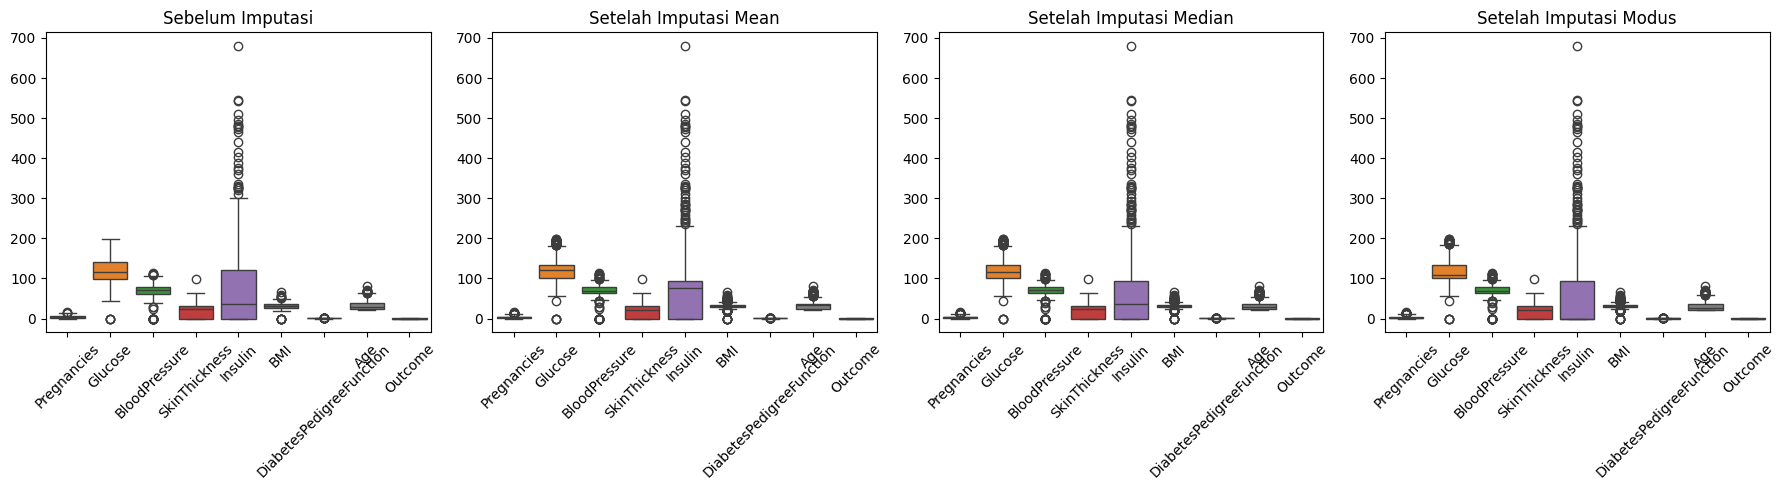

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Menampilkan informasi dataframe
data.info()

# Mengecek missing value pada dataset
missing_values = data.isnull().sum()
print("Missing values sebelum imputasi:\n", missing_values[missing_values > 0])

# Imputasi dengan mean
data_mean = data.fillna(data.mean())

# Imputasi dengan median
data_median = data.fillna(data.median())

# Imputasi dengan modus
data_mode = data.fillna(data.mode().iloc[0])

# Visualisasi data sebelum dan sesudah imputasi
plt.figure(figsize=(18, 5))

# Visualisasi Sebelum Imputasi
plt.subplot(1, 4, 1)
sns.boxplot(data=data)
plt.title('Sebelum Imputasi')
plt.xticks(rotation=45)

# Visualisasi Setelah Imputasi Mean
plt.subplot(1, 4, 2)
sns.boxplot(data=data_mean)
plt.title('Setelah Imputasi Mean')
plt.xticks(rotation=45)

# Visualisasi Setelah Imputasi Median
plt.subplot(1, 4, 3)
sns.boxplot(data=data_median)
plt.title('Setelah Imputasi Median')
plt.xticks(rotation=45)

# Visualisasi Setelah Imputasi Modus
plt.subplot(1, 4, 4)
sns.boxplot(data=data_mode)
plt.title('Setelah Imputasi Modus')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [16]:
# Cek missing values setelah imputasi
missing_mean = data_mean.isnull().sum()
missing_median = data_median.isnull().sum()
missing_mode = data_mode.isnull().sum()

print("Missing values setelah imputasi dengan Mean:\n", missing_mean[missing_mean > 0])
print("\nMissing values setelah imputasi dengan Median:\n", missing_median[missing_median > 0])
print("\nMissing values setelah imputasi dengan Modus:\n", missing_mode[missing_mode > 0])

Missing values setelah imputasi dengan Mean:
 Series([], dtype: int64)

Missing values setelah imputasi dengan Median:
 Series([], dtype: int64)

Missing values setelah imputasi dengan Modus:
 Series([], dtype: int64)


#### Interpretasi
Setelah melakukan imputasi pada dataset diabetes, boxplot dapat digunakan untuk melihat perbandingan distribusi data sebelum dan sesudah imputasi. Metode mean, median, dan mode dapat digunakan untuk melakukan ini.

Sebelum imputasi, beberapa nilai di beberapa kolom hilang, yang dapat mengganggu analisis lebih lanjut. Setelah imputasi dengan mean, median, dan modus, boxplot menunjukkan bahwa distribusi data cenderung lebih stabil dan tidak ada nilai ekstrem yang signifikan.

Sementara imputasi modus dan median cenderung lebih kuat terhadap outlier, imputasi dengan mean menghasilkan distribusi yang lebih simetris. Meskipun ketiga metode tersebut berhasil mengisi nilai yang hilang, perbedaan dalam distribusi data setelah imputasi menunjukkan bagaimana setiap metode dapat mempengaruhi analisis yang akan dilakukan selanjutnya. Keseluruhan, setelah imputasi, tidak ada nilai hilang yang tersisa, yang menandakan bahwa data sudah siap untuk analisis lebih lanjut.


## 2. Cek korelasi antar variabel dengan heatmap

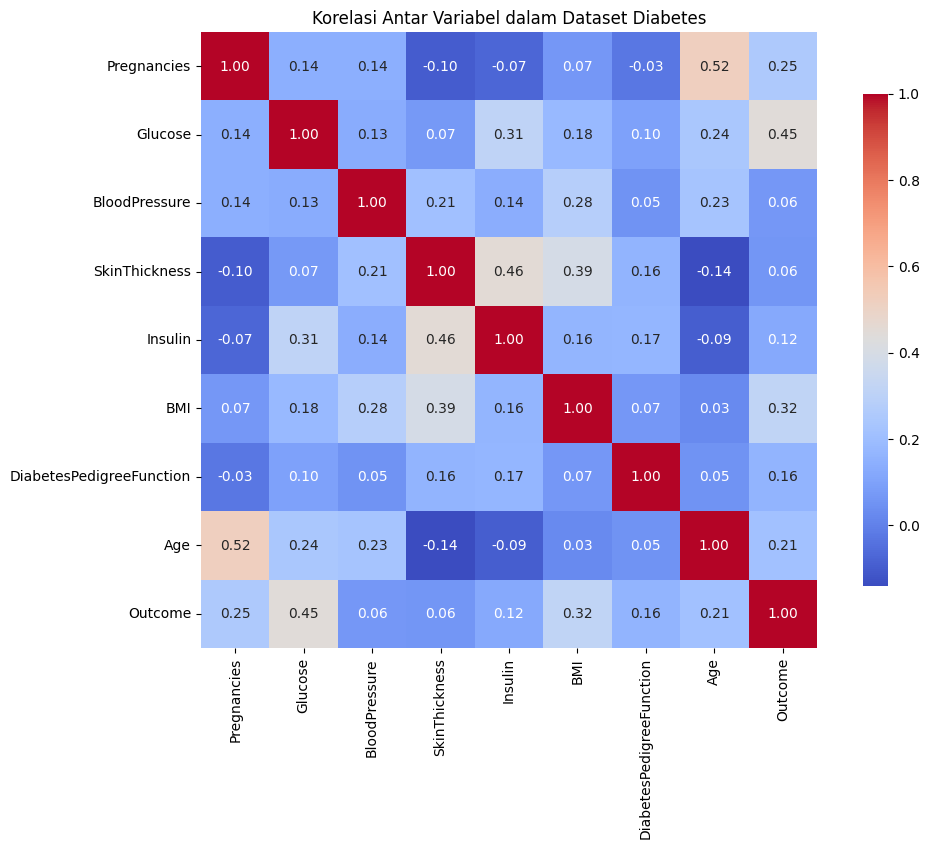

In [5]:
# Menghitung matriks korelasi
correlation_matrix = data.corr()

# Mengatur ukuran figure
plt.figure(figsize=(12, 8))

# Membuat heatmap
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})

# Menambahkan judul
plt.title('Korelasi Antar Variabel dalam Dataset Diabetes')

# Menampilkan plot
plt.show()

#### Interpretasi
Setelah melakukan heatmap korelasi pada kumpulan data diabetes, terlihat bahwa variabel glukosa dan indeks massa tubuh (BMI) memiliki korelasi yang kuat dengan Outcome, ini menunjukkan bahwa jika kadar glukosa meningkat dan BMI meningkat, ada kemungkinan lebih besar bahwa seseorang akan mendapatkan diagnosis diabetes. Namun, ada korelasi yang lebih lemah antara tekanan darah dan ketebalan kulit. Warna pada heatmap menunjukkan kekuatan dan arah hubungan, dengan warna merah menunjukkan korelasi yang sangat kuat dan positif, warna biru menunjukkan korelasi yang sangat negatif, dan warna netral menunjukkan bahwa tidak ada korelasi yang signifikan. Oleh karena itu, heatmap ini membantu dalam menentukan faktor risiko utama yang mempengaruhi pengobatan diabetes.



## 3. Lakukan imbalance handling dengan undersampling

In [9]:
import pandas as pd
from imblearn.under_sampling import RandomUnderSampler
import numpy as np

# Membaca data dari CSV
data = pd.read_csv('/content/diabetes (2).csv')

# Mengubah label numerik ke kategori yang sesuai
data['Outcome'] = data['Outcome'].map({0: 'No Diabetes', 1:'Diabetes'})

# Memisahkan fitur dan target
X = data.drop('Outcome', axis=1)
y = data['Outcome']

# Menggunakan RandomUnderSampler
rus = RandomUnderSampler(random_state=42)

# Melakukan undersampling
X_resampled, y_resampled = rus.fit_resample(X, y)

# Mengonversi kembali ke DataFrame
resampled_data = pd.DataFrame(X_resampled, columns=X.columns)
resampled_data['Outcome'] = y_resampled

# Menampilkan hasil
print("Jumlah data sebelum undersampling:")
print(data['Outcome'].value_counts())
print("\nJumlah data setelah undersampling:")
print(resampled_data['Outcome'].value_counts())

Jumlah data sebelum undersampling:
Outcome
No Diabetes    500
Diabetes       268
Name: count, dtype: int64

Jumlah data setelah undersampling:
Outcome
Diabetes       268
No Diabetes    268
Name: count, dtype: int64


#### Interpretasi
Pada kode di ata dapat menangani ketidakseimbangan data pada dataset diabetes menggunakan metode undersampling. Pertama, data dibaca dari file CSV, dan label numerik di kolom Outcome diubah menjadi kategori yang lebih jelas, yaitu No Diabetes dan Diabetes. Selanjutnya, fitur dan target dipisahkan, dan kita menggunakan RandomUnderSampler untuk mengurangi jumlah sampel dari kelas yang lebih dominan agar seimbang dengan kelas yang kurang. Hasilnya adalah dataset yang telah disesuaikan, dan kita mencetak jumlah data sebelum dan sesudah proses undersampling. Dengan cara ini, kita memastikan bahwa dataset yang digunakan untuk analisis atau pengembangan model memiliki distribusi kelas yang lebih seimbang, yang dapat meningkatkan akurasi model prediksi.

## 4. Lakukan scaling dengan robust scaler dan minmax

In [10]:
import pandas as pd
from sklearn.preprocessing import RobustScaler, MinMaxScaler

# Membaca data dari file CSV
data = pd.read_csv('diabetes (2).csv')

# Memisahkan fitur dan target
X = data.drop('Outcome', axis=1)  # Semua kolom kecuali 'Outcome'
y = data['Outcome']  # Kolom target

# Menggunakan RobustScaler
robust_scaler = RobustScaler()
X_robust_scaled = robust_scaler.fit_transform(X)

# Menggunakan MinMaxScaler
minmax_scaler = MinMaxScaler()
X_minmax_scaled = minmax_scaler.fit_transform(X)

# Mengkonversi kembali ke DataFrame
X_robust_scaled_df = pd.DataFrame(X_robust_scaled, columns=X.columns)
X_minmax_scaled_df = pd.DataFrame(X_minmax_scaled, columns=X.columns)

# Menampilkan hasil
print("Data setelah RobustScaler:")
print(X_robust_scaled_df.head())

print("\nData setelah MinMaxScaler:")
print(X_minmax_scaled_df.head())

Data setelah RobustScaler:
   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0          0.6       NaN       0.000000        0.37500 -0.298755       NaN   
1         -0.4 -0.756098      -0.333333        0.18750 -0.298755       NaN   
2          1.0  1.634146      -0.444444       -0.71875 -0.298755 -0.961957   
3         -0.4 -0.658537      -0.333333        0.00000  0.481328 -0.440217   
4         -0.6       NaN      -1.777778        0.37500  1.095436  1.190217   

   DiabetesPedigreeFunction     Age  
0                  0.675258     NaN  
1                 -0.036082  0.1250  
2                  0.791237  0.1875  
3                 -0.510309 -0.5000  
4                       NaN  0.2500  

Data setelah MinMaxScaler:
   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.352941       NaN       0.631579       0.353535  0.000000       NaN   
1     0.058824  0.427136       0.578947       0.292929  0.000000       NaN   
2     0.470588

In [15]:
import pandas as pd
from sklearn import preprocessing

# Membaca data dari file CSV
data = pd.read_csv('diabetes (2).csv')

# Menampilkan data sebelum scaling
print("Data sebelum Scaling:")
print(data.head())

# Melakukan Scaling dengan RobustScaler
scaler = preprocessing.RobustScaler()  # Untuk melakukan preprocessing robust scaler
robust_data = scaler.fit_transform(data)   # Mengtransformasi data ke robust scaler
robust_data = pd.DataFrame(robust_data, columns=data.columns)  # Mengubah hasil ke DataFrame

# Menampilkan data setelah RobustScaler
print("\nData setelah RobustScaler:")
print(robust_data.head())

# Melakukan Scaling dengan MinMaxScaler
scaler = preprocessing.MinMaxScaler()  # Untuk melakukan preprocessing minmax scaler
minmax_data = scaler.fit_transform(data)    # Mengtransformasi data ke minmax
minmax_data = pd.DataFrame(minmax_data, columns=data.columns)  # Mengubah hasil ke DataFrame

# Menampilkan data setelah MinMaxScaler
print("\nData setelah MinMaxScaler:")
print(minmax_data.head())

Data sebelum Scaling:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          6.0      NaN           72.0           35.0      0.0   NaN   
1          1.0     85.0           66.0           29.0      0.0   NaN   
2          8.0    183.0           64.0            0.0      0.0  23.3   
3          1.0     89.0           66.0           23.0     94.0  28.1   
4          0.0      NaN           40.0           35.0    168.0  43.1   

   DiabetesPedigreeFunction   Age  Outcome  
0                     0.627   NaN        1  
1                     0.351  31.0        0  
2                     0.672  32.0        1  
3                     0.167  21.0        0  
4                       NaN  33.0        1  

Data setelah RobustScaler:
   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0          0.6       NaN       0.000000        0.37500 -0.298755       NaN   
1         -0.4 -0.756098      -0.333333        0.18750 -0.298755       NaN   
2          1.

#### Interpretasikan
Dalam kode di atas, pertama-tama kita membaca dataset dari file CSV yang berisi informasi tentang diabetes. Setelah itu, kita menampilkan beberapa baris pertama dari data asli untuk memberikan gambaran tentang data sebelum dilakukan scaling. Selanjutnya, kita menerapkan RobustScaler, yang mengubah skala data dengan mempertimbangkan nilai median dan interquartile range, sehingga lebih robust terhadap outlier. Hasilnya kemudian dikonversi kembali ke dalam DataFrame dan ditampilkan. Setelah itu, kita menggunakan MinMaxScaler, yang menskalakan data ke rentang antara 0 dan 1, yang juga dikonversi menjadi DataFrame dan ditampilkan. Proses ini membantu dalam mempersiapkan data untuk analisis lebih lanjut, terutama dalam konteks algoritma pembelajaran mesin yang sensitif terhadap skala data.




